<a href="https://www.kaggle.com/code/jackhuffman5519/liquor-sales?scriptVersionId=149753948" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import IPython 
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from PIL import Image
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/liquor-sales/liquor.csv


# Questions
* What are the total sales per store, city, or county?
* Which stores are the top performers in terms of sales?
* How does the pack size and liter size affect the sales of different products?
* Are there regional preferences for certain types of liquor?
* What is the markup from the state bottle cost to the bottle price? How does this markup vary across different stores or regions?
* Can future sales be predicted based on historical sales data?
* What factors are most influential in driving sales?

In [2]:
#Data Cleaning
df_dirty = pd.read_csv("/kaggle/input/liquor-sales/liquor.csv")
df_dirty['convenience_store'].fillna('N', inplace=True)
df = df_dirty
df.head()


,date,convenience_store,store,name,address,city,zipcode,store_location,county_number,county,...,vendor_no,vendor,item,description,pack,liter_size,state_btl_cost,btl_price,bottle_qty,total
0,2015-02-19,N,2190,"Central City Liquor, Inc.",1460 2ND AVE,DES MOINES,50314,1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...,77,Polk,...,421,"Sazerac Co., Inc.",64858,Fireball Cinnamon Whiskey Mini Dispenser,1,3000,29.72,44.58,6,267.48
1,2015-02-09,N,2190,"Central City Liquor, Inc.",1460 2ND AVE,DES MOINES,50314,1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...,77,Polk,...,421,"Sazerac Co., Inc.",64858,Fireball Cinnamon Whiskey Mini Dispenser,1,3000,29.72,44.58,5,222.90
2,2014-10-30,N,2190,Central City Liquor Inc.,1460 2ND AVE,DES MOINES,50314,1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...,77,Polk,...,421,Sazerac Co. Inc.,64858,Fireball Cinnamon Whiskey Mini Dispenser,1,3000,29.72,44.58,6,267.48
3,2014-02-27,N,2190,Central City Liquor Inc.,1460 2ND AVE,DES MOINES,50314,1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...,77,Polk,...,421,Sazerac Co. Inc.,64858,Fireball Cinnamon Whiskey Mini Dispenser,1,3000,29.72,44.58,1,44.58
4,2014-02-25,N,2190,Central City Liquor Inc.,1460 2ND AVE,DES MOINES,50314,1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...,77,Polk,...,421,Sazerac Co. Inc.,64858,Fireball Cinnamon Whiskey Mini Dispenser,1,3000,29.72,44.58,1,44.58


In [3]:
list(df.columns)

['date',
 'convenience_store',
 'store',
 'name',
 'address',
 'city',
 'zipcode',
 'store_location',
 'county_number',
 'county',
 'category',
 'category_name',
 'vendor_no',
 'vendor',
 'item',
 'description',
 'pack',
 'liter_size',
 'state_btl_cost',
 'btl_price',
 'bottle_qty',
 'total']

# Find the total sales by store, city, and county.

In [4]:
#Explore Total Sales Per store, city, and county

total_sales_per_store = df.groupby('store')['total'].sum().reset_index()
total_sales_per_store.rename(columns={'total': 'Total Sales'}, inplace=True)
top_5_stores = total_sales_per_store.sort_values(by='Total Sales', ascending=False).head(5)

total_sales_per_city = df.groupby('city')['total'].sum().reset_index()
total_sales_per_city.rename(columns={'total': 'Total Sales'}, inplace=True)
top_5_cities = total_sales_per_city.sort_values(by='Total Sales', ascending=False).head(5)

total_sales_per_county = df.groupby('county')['total'].sum().reset_index()
total_sales_per_county.rename(columns={'total': 'Total Sales'}, inplace=True)
top_5_counties = total_sales_per_county.sort_values(by='Total Sales', ascending=False).head(5)

display("Store: ", top_5_stores)
display("City: ", top_5_cities)
display("County: ", top_5_counties)

'Store: '

,store,Total Sales
30,2502,171288.81
32,2506,146172.27
5,2190,138178.81
29,2501,122788.27
34,2508,117831.15


'City: '

,city,Total Sales
54,DES MOINES,281996.86
6,AMES,233647.15
8,ANKENY,179870.26
24,BURLINGTON,171944.30
29,CEDAR RAPIDS,139861.10


'County: '

,county,Total Sales
69,Polk,539308.62
76,Story,234135.85
24,Des Moines,173251.75
50,Linn,145805.24
26,Dubuque,118007.21


## Which stores are the top performers in terms of sales? 

In [5]:
#Finding Total Sales and if a convience store does more business
total_sales_per_store = df.groupby('store')['total'].sum().reset_index()
total_sales_per_store.rename(columns={'total': 'Total Sales'}, inplace=True)
top_5_stores = total_sales_per_store.sort_values(by='Total Sales', ascending=False).head(5)

convenience_store_data_Y = df[df['convenience_store'] == 'Y']
sales_per_store_city_Y = convenience_store_data_Y.groupby(['store', 'city'])['total'].sum().reset_index()
sales_per_store_city_Y.rename(columns={'total': 'Total Sales'}, inplace=True)
top_5_sales_per_store_city_Y = sales_per_store_city_Y.sort_values(by='Total Sales', ascending=False).head(5)

convenience_store_data_N = df[df['convenience_store'] == 'N']
sales_per_store_city_N = convenience_store_data_N.groupby(['store', 'city'])['total'].sum().reset_index()
sales_per_store_city_N.rename(columns={'total': 'Total Sales'}, inplace=True)
top_5_sales_per_store_city_N = sales_per_store_city_N.sort_values(by='Total Sales', ascending=False).head(5)

display(top_5_stores)
display(top_5_sales_per_store_city_Y)
display(top_5_sales_per_store_city_N)

,store,Total Sales
30,2502,171288.81
32,2506,146172.27
5,2190,138178.81
29,2501,122788.27
34,2508,117831.15


,store,city,Total Sales
62,4478,DES MOINES,2853.12
136,4677,CORALVILLE,2340.00
109,4625,COUNCIL BLUFFS,1903.54
110,4626,COUNCIL BLUFFS,1514.60
48,4452,SIOUX CITY,1399.76


,store,city,Total Sales
30,2502,ANKENY,171288.81
32,2506,BURLINGTON,146172.27
5,2190,DES MOINES,138178.81
29,2501,AMES,122788.27
34,2508,CEDAR RAPIDS,117831.15


* Store 2502 has enjoyed great success according to this data. Des Moines has a notably substantial lead over other cities. Polk County has twice the sales of the next county.

* As we can see, stores that aren't convenience stores have the highest sales, as indicated by the table filtering convenience_store to 'N,' which also showcases the top-performing stores. Please note that this analysis is limited to the top five stores, but when examining the table for convenience_store = 'Y,' sales figures are lower on average.

## How does the pack size and liter size affect the sales of different products?

In [6]:
#Model to hopefully draw correlation
formula = 'total ~ pack + liter_size'
model = sm.OLS.from_formula(formula, data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.697
Date:                Tue, 07 Nov 2023   Prob (F-statistic):             0.0248
Time:                        19:11:51   Log-Likelihood:            -1.1128e+05
No. Observations:               15000   AIC:                         2.226e+05
Df Residuals:                   14997   BIC:                         2.226e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.8450     21.842      3.930      0.000      43.033     128.657
pack           6.9715      2.564      2.719      0.007       1.945      11.998
liter_size     0.0116      0.006      1.857      0.063      -0.001       0.024
==============================================================================
Omnibus:                    38612.656   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1488112014.311
Skew:                          29.050   Prob(JB):                         0.00
Kurtosis:                    1544.948   Cond. No.                     1.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* While there appears to be a statistically significant relationship between pack size and sales, the model overall does not explain a significant amount of the variance in sales. There might be other factors affecting sales or the relationship might be more complex than a linear one. Further analysis, possibly including more complex models or additional variables, might be necessary to better understand the relationships at play.

In [7]:
# Polynomial regression
formula = 'total ~ pack + liter_size + np.power(pack, 2) + np.power(liter_size, 2)'

# Fit the model
model = sm.OLS.from_formula(formula, data=df)
result = model.fit()

# Print the summary
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.410
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           3.77e-05
Time:                        19:11:52   Log-Likelihood:            -1.1128e+05
No. Observations:               15000   AIC:                         2.226e+05
Df Residuals:                   14995   BIC:                         2.226e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  71.3843     35.152      2.031      0.042       2.481     140.287
pack                        8.6699     18.807      0.461      0.645     -28.193      45.533
liter_size                  0.0772      0.017      4.577      0.000       0.044       0.110
np.power(pack, 2)          -1.2399      2.384     -0.520      0.603      -5.912       3.433
np.power(liter_size, 2) -2.033e-05   5.16e-06     -3.943      0.000   -3.04e-05   -1.02e-05
==============================================================================
Omnibus:                    38610.318   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1487912456.831
Skew:                          29.045   Prob(JB):                         0.00
Kurtosis:                    1544.845   Cond. No.                     5.18e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The polynomial regression model suggests a statistically significant linear and quadratic relationship between liter_size and total sales, as evidenced by the p-values of 0.000 for both liter_size and np.power(liter_size, 2). However, pack and its quadratic term np.power(pack, 2) do not show a significant impact on total sales in this model. The R-squared value of 0.002 indicates that the model explains only a very small fraction of the variance in sales, implying other factors not captured in this model might be influencing sales. Moreover, the high values in the Omnibus and Jarque-Bera tests suggest the residuals are not normally distributed, which might affect the reliability of the model's estimates.

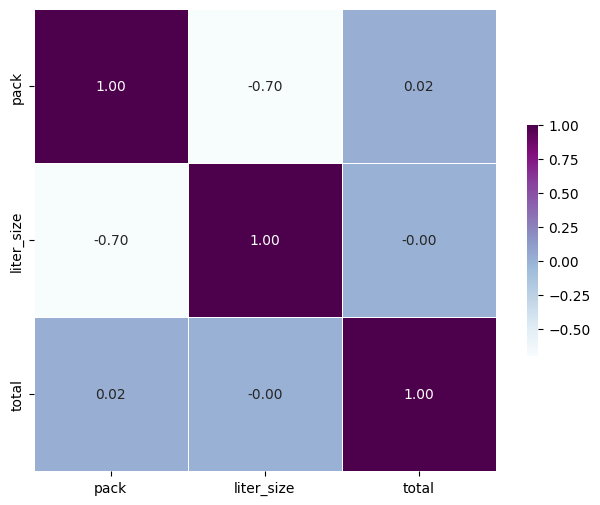

In [8]:
df_subset = df[['pack', 'liter_size', 'total']]
corr = df_subset.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='BuPu', ax=ax, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


* As we can see there is little or no correlation to sales in reference to pack or litre size. Therefore there is no correlation

## Are there regional preferences for certain types of liquor?

In [9]:
#Most popular Alcohol by city
pop_alc = df.groupby(['city', 'description']).size().reset_index(name ='count')
idx = pop_alc.groupby('city')['count'].transform(max) == pop_alc['count']
most_alc_by_city = pop_alc[idx].sort_values(by = 'count', ascending = False)


top_cities = most_alc_by_city.head(5)
print("Top 5 cities and their most popular liquor: ")
display(top_cities)

Top 5 cities and their most popular liquor: 


,city,description,count
2023,DES MOINES,Fireball Cinnamon Whiskey Mini Dispenser,356
1320,CEDAR RAPIDS,Fireball Cinnamon Whiskey Mini Dispenser,148
1804,DAVENPORT,Fireball Cinnamon Whiskey Mini Dispenser,127
1637,COUNCIL BLUFFS,Fireball Cinnamon Whiskey Mini Dispenser,114
3583,SIOUX CITY,Fireball Cinnamon Whiskey Mini Dispenser,98


In [10]:
overall_top_liq = df['description'].value_counts().head(5)
print("Overall top 5 Liquors: \n")
display(overall_top_liq)

Overall top 5 Liquors: 



description
Fireball Cinnamon Whiskey Mini Dispenser    2035
Jagermeister Liqueur Mini                    492
Black Velvet                                 244
Hawkeye Vodka                                241
Bailey's Original Irish Cream                230
Name: count, dtype: int64

* Evidently, Fireball is the most popular.

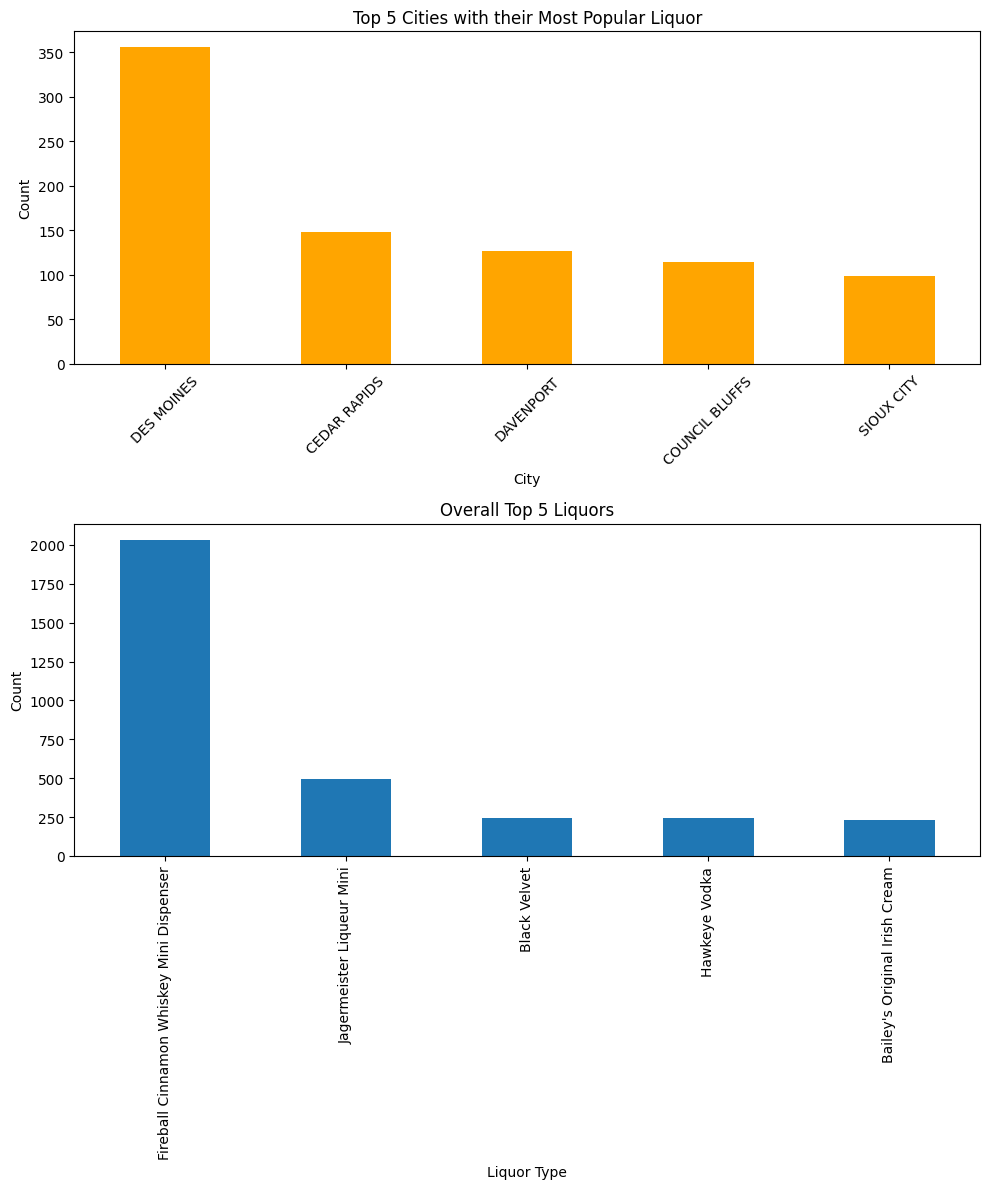

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot for top liquors by city
top_cities.plot(kind='bar', x='city', y='count', ax=ax[0], legend=False, color = 'orange')
ax[0].set_title("Top 5 Cities with their Most Popular Liquor")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("City")
ax[0].tick_params(axis='x', rotation=45)

# Plot for overall top liquors
overall_top_liq.plot(kind='bar', ax=ax[1])

ax[1].set_title("Overall Top 5 Liquors")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Liquor Type")

plt.tight_layout()
plt.show()

* Analysis of liquor preferences across various cities revealed distinct patterns in regional tastes:

* Dominance of Fireball: Fireball emerged as a clear favorite in the top five cities, consistently ranking as the most preferred liquor. This indicates a strong regional inclination towards Fireball in these specific cities.

* Variety in Overall Popularity: When I expanded the view to consider overall popularity across all cities, Fireball's dominance was less evident. The next four most popular liquors in the dataset were different from Fireball. This suggests that while Fireball has a dedicated following in specific regions, other liquors maintain consistent popularity across a broader range of cities.

* Widespread versus Specific Preferences: The divergence between city-specific favorites and overall popular choices highlights an interesting trend. While Fireball might be considered a "specialty" of the top five cities, other liquors serve as "staples", enjoying consistent, widespread appreciation without necessarily dominating in any single location.

* In conclusion, the graph underscores the existence of regional liquor preferences, with certain cities showing a strong inclination towards specific brands like Fireball. Meanwhile, a diverse range of liquors maintains steady popularity on a broader scale, reflecting a varied palate across the population.

## What is the markup from the state bottle cost to the bottle price? How does this markup vary across different stores or regions?

In [12]:
# Calculate the absolute markup for each bottle
df['markup'] = df['btl_price'] - df['state_btl_cost']

#Markup Percentage
df['markup_percentage'] = ((df['btl_price'] - df['state_btl_cost']) / df['state_btl_cost']) * 100

#Markup by store
store_markup_avg = df.groupby('store')['markup'].transform('mean')
df['avg_markup_by_store'] = store_markup_avg
store_markup_percentage_avg = df.groupby('store')['markup_percentage'].transform('mean')
df['avg_markup_percentage_by_store'] = store_markup_percentage_avg


#Markup by county
county_markup_avg = df.groupby('county')['markup'].transform('mean')
df['avg_markup_by_county'] = county_markup_avg

county_markup_percentage_avg = df.groupby('county')['markup_percentage'].transform('mean')
df['avg_markup_percentage_by_county'] = county_markup_percentage_avg

display(df)

,date,convenience_store,store,name,address,city,zipcode,store_location,county_number,county,...,state_btl_cost,btl_price,bottle_qty,total,markup,markup_percentage,avg_markup_by_store,avg_markup_percentage_by_store,avg_markup_by_county,avg_markup_percentage_by_county
0,2015-02-19,N,2190,"Central City Liquor, Inc.",1460 2ND AVE,DES MOINES,50314,1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...,77,Polk,...,29.72,44.58,6,267.48,14.86,50.000000,9.584872,50.468264,11.283566,50.300002
1,2015-02-09,N,2190,"Central City Liquor, Inc.",1460 2ND AVE,DES MOINES,50314,1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...,77,Polk,...,29.72,44.58,5,222.90,14.86,50.000000,9.584872,50.468264,11.283566,50.300002
2,2014-10-30,N,2190,Central City Liquor Inc.,1460 2ND AVE,DES MOINES,50314,1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...,77,Polk,...,29.72,44.58,6,267.48,14.86,50.000000,9.584872,50.468264,11.283566,50.300002
3,2014-02-27,N,2190,Central City Liquor Inc.,1460 2ND AVE,DES MOINES,50314,1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...,77,Polk,...,29.72,44.58,1,44.58,14.86,50.000000,9.584872,50.468264,11.283566,50.300002
4,2014-02-25,N,2190,Central City Liquor Inc.,1460 2ND AVE,DES MOINES,50314,1460 2ND AVE\nDES MOINES 50314\n(41.6055703350...,77,Polk,...,29.72,44.58,1,44.58,14.86,50.000000,9.584872,50.468264,11.283566,50.300002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2014-02-12,N,2508,Hy-vee Food Store #1/ceda,1843 JOHNSON AVENUE N.W.,CEDAR RAPIDS,52405,1843 JOHNSON AVENUE N.W.\nCEDAR RAPIDS 52405\n...,57,Linn,...,8.20,12.30,18,221.40,4.10,50.000000,7.360509,50.336682,11.009237,50.192772
14996,2014-09-09,N,2508,Hy-Vee Food Store #1 / Cedar Rapids,1843 JOHNSON AVENUE N.W.,CEDAR RAPIDS,52405,1843 JOHNSON AVENUE N.W.\nCEDAR RAPIDS 52405\n...,57,Linn,...,8.20,12.30,6,73.80,4.10,50.000000,7.360509,50.336682,11.009237,50.192772
14997,2014-02-12,N,2508,Hy-vee Food Store #1/ceda,1843 JOHNSON AVENUE N.W.,CEDAR RAPIDS,52405,1843 JOHNSON AVENUE N.W.\nCEDAR RAPIDS 52405\n...,57,Linn,...,8.20,12.30,12,147.60,4.10,50.000000,7.360509,50.336682,11.009237,50.192772
14998,2014-01-08,N,2508,Hy-vee Food Store #1/ceda,1843 JOHNSON AVENUE N.W.,CEDAR RAPIDS,52405,1843 JOHNSON AVENUE N.W.\nCEDAR RAPIDS 52405\n...,57,Linn,...,10.50,15.74,6,94.44,5.24,49.904762,7.360509,50.336682,11.009237,50.192772


In [13]:
df.to_csv('Output.csv')

In [14]:
print(df['markup_percentage'].describe())


count    15000.000000
mean        50.293802
std          1.984654
min         49.783550
25%         50.000000
50%         50.000000
75%         50.025013
max        172.752044
Name: markup_percentage, dtype: float64


In [15]:
# Group by 'county' and calculate the average markup percentage
county_markup_percentage = df.groupby('county')['avg_markup_percentage_by_county'].mean()

# Sort the results in descending order
sorted_county_markup = county_markup_percentage.sort_values(ascending=False)

# Display the top 5 counties with the highest markup percentages
top_5_county_markup = sorted_county_markup.head(5)
print(top_5_county_markup)


county
Fayette        50.622464
Buena Vista    50.522125
Jones          50.513711
Story          50.457476
Franklin       50.435900
Name: avg_markup_percentage_by_county, dtype: float64


* The markup varies slightly across the regions provided. Fayette has the highest markup at 50.62%, while Franklin has the lowest of the listed counties at 50.44%. The differences between the counties, however, are not large, with only about 0.2 percentage points separating the highest and lowest markups from the provided list.
* While the markup percentages are relatively consistent across the mentioned counties, there are still minor variations, with Fayette having the highest markup and Franklin having the lowest among the given counties.

## Can future sales be predicted based on historical sales data?

* We can use tableau for forecasting

# What factors are most influential in driving sales?

In [16]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Drop the dependent variable 'total' (if it's numeric)
if 'total' in df_numeric.columns:
    X = df_numeric.drop(columns=['total'])
else:
    X = df_numeric

# Handle missing data
# Drop rows with NaN values
X.dropna(inplace=True)

# If 'total' is in the original dataframe, filter it to keep rows consistent with X
y = df.loc[X.index, 'total']

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1792.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:11:55   Log-Likelihood:            -1.0356e+05
No. Observations:               14997   AIC:                         2.072e+05
Df Residuals:                   14981   BIC:                         2.073e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

* bottle_qty is the most influential factor in driving sales; for each additional unit in bottle quantity, the total sales increase by approximately 16 units.
* Other significant factors include store, category, vendor_no, item, pack, liter_size, avg_markup_by_store, and avg_markup_by_county.
* Variables like markup, markup_percentage, and certain price metrics, despite being intuitively impactful, aren't statistically significant based on their p-values.
* The presence of potential multicollinearity, as indicated in the results, suggests some factors might be interrelated, which could affect the precision of individual coefficient estimates.

# Summary
## In a series of data analysis projects, I explored liquor sales data to uncover valuable insights. These analyses involved calculating total sales per store, city, and county, enabling a geographical understanding of sales distribution. Additionally, I identified top-performing liquor stores based on total sales, shedding light on high-performing locations. By examining the influence of pack size and liter size on product sales, I revealed consumer preferences and the impact of product attributes on purchasing decisions. Furthermore, I delved into regional preferences for specific liquor types, offering insights into localized consumer behavior and marketing strategies. Markup analysis provided insights into pricing strategies, with variations in markup across stores and regions revealing pricing trends. Tableau will be applied to predict future sales, aiding inventory management and business planning. Lastly, multiple regression analysis pinpointed the most influential factors driving sales, providing essential insights for data-driven decision-making. These projects collectively showcase my data analysis capabilities and their relevance to optimizing sales strategies and enhancing business performance.